### Dummy dataset

In [118]:
from sklearn.datasets import make_blobs

In [119]:
data, labels = make_blobs(n_samples=50, centers=5, random_state=42)
data

array([[  4.62638161,   0.91545875],
       [  3.31169279,   2.17003092],
       [ -7.36043371,   6.8052527 ],
       [-11.45807286,   8.14542542],
       [ -1.04354885,   8.78850983],
       [ -2.44166942,   7.58953794],
       [ -3.6601912 ,   9.38998415],
       [  5.46242375,   0.75232603],
       [ -7.35880143,  -7.06576857],
       [  2.31842051,   4.42250683],
       [  4.52423055,   1.67206599],
       [ -6.95163731,  -5.8765767 ],
       [ -8.47669173,   6.67840316],
       [ -3.05358035,   9.12520872],
       [ -8.75128069,   7.02451557],
       [  4.84874243,   0.01349956],
       [ -7.71884471,  -7.18932197],
       [ -6.55554322,  -7.26519187],
       [ -8.74656698,   5.335954  ],
       [  4.17924007,   3.03029191],
       [ -3.52202874,   9.32853346],
       [ -6.06710137,  -5.52386956],
       [  1.32024714,   3.83378941],
       [ -5.84862767,  -5.94882947],
       [  4.03924015,   1.68147593],
       [ -7.92292564,   7.65227403],
       [ -4.23411546,   8.4519986 ],
 

In [120]:
import matplotlib.pyplot as plt

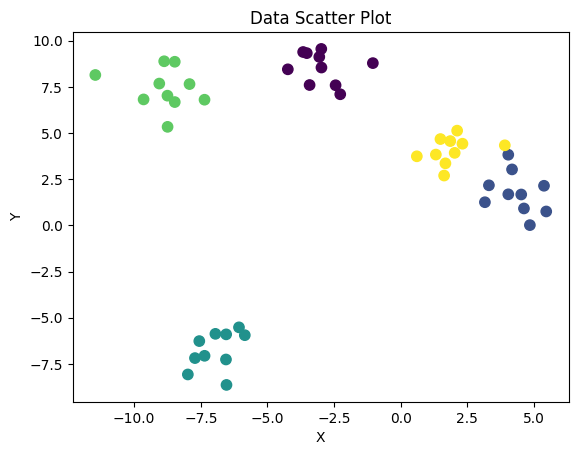

In [121]:
# Visualisation
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Scatter Plot")
plt.show()

In [122]:
# scaling the data
from sklearn.preprocessing import StandardScaler, normalize

In [123]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
data_normalised = normalize(data_scaled)

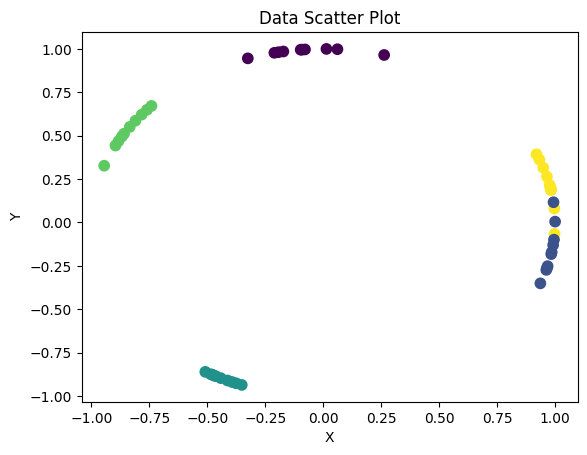

In [124]:
# Visualisation
plt.scatter(data_normalised[:, 0], data_normalised[:, 1], c=labels, cmap='viridis', s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Scatter Plot")
plt.show()

### Implementation

In [125]:
from sklearn.cluster import DBSCAN

- Type1:
    - Unnormalised data and random eps and min_samples

In [126]:
dbscan_type_1 = DBSCAN() # uses eps = 0.5 , min_samples = 5
result = dbscan_type_1.fit(data)

In [127]:
labels_db_1 = result.labels_
labels_db_1 # levels all data as anomaly

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

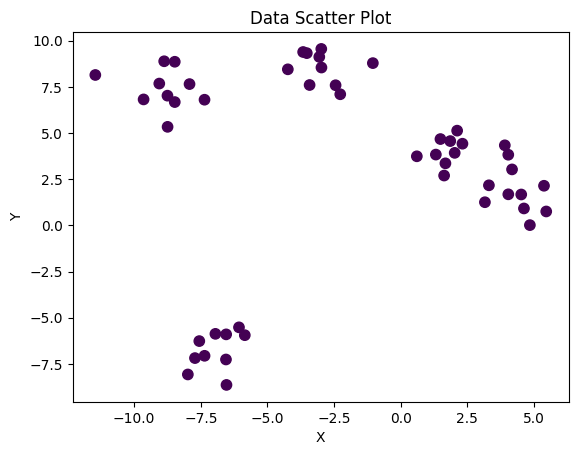

In [128]:
# Visualisation
plt.scatter(data[:, 0], data[:, 1], c=labels_db_1, cmap='viridis', s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Scatter Plot")
plt.show()

- Type2:
    - Normalised data and random attributes (min-samples, eps)

In [131]:
dbscan_type_2 = DBSCAN() # uses eps = 0.5 , min_samples = 5
result = dbscan_type_2.fit(data_normalised)
labels_db_2 = result.labels_
labels_db_2

array([0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0])

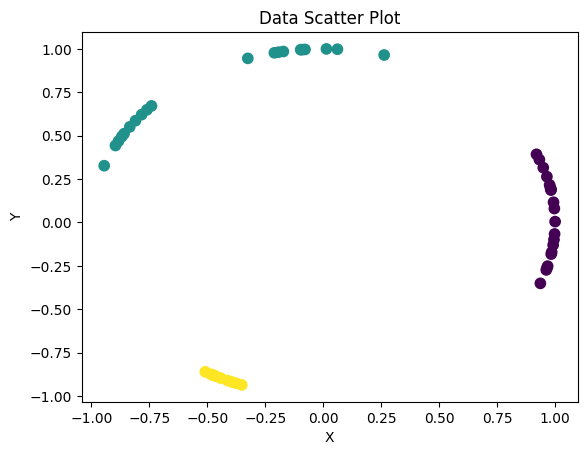

In [132]:
# Visualisation
plt.scatter(data_normalised[:, 0], data_normalised[:, 1], c=labels_db_2, cmap='viridis', s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Scatter Plot")
plt.show()

- Type3
    - ***Normalised data***
    - Selected best fitted ***eps by elbow method***
    - Selected ***min_sample by thumb rule (dim of sample + 1 -> 2 * dim of sample)***

> ***Elbow method -> powered by KNN***

In [135]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nn = NearestNeighbors() # takes n_samples = 5, number of samples in a cluster
nn_result = nn.fit(data_normalised)
nn_result

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,n_jobs,None


In [150]:
neighs = nn.kneighbors(data_normalised)
n_dists = neighs[0]
n_ids = neighs[1]
neighs, n_ids[:,-1]

((array([[0.        , 0.0087669 , 0.01359695, 0.07979515, 0.09099797],
         [0.        , 0.03099856, 0.0418518 , 0.0530617 , 0.06400098],
         [0.        , 0.04333718, 0.04390702, 0.08008029, 0.08962763],
         [0.        , 0.02889399, 0.02928268, 0.04879725, 0.09508333],
         [0.        , 0.20420519, 0.25143649, 0.34291794, 0.35580831],
         [0.        , 0.04753743, 0.09248419, 0.10555979, 0.11111846],
         [0.        , 0.01841348, 0.02099011, 0.09646456, 0.10202455],
         [0.        , 0.0087669 , 0.02236352, 0.07103446, 0.08223927],
         [0.        , 0.01061834, 0.01589357, 0.02413708, 0.02474572],
         [0.        , 0.04890726, 0.05400899, 0.06700306, 0.07615572],
         [0.        , 0.01121301, 0.0418518 , 0.07283855, 0.08223927],
         [0.        , 0.00527534, 0.00885259, 0.01589357, 0.03610044],
         [0.        , 0.01951806, 0.02928268, 0.05817052, 0.06582357],
         [0.        , 0.00556684, 0.01865826, 0.07549357, 0.09646456],
      

In [144]:
import numpy as np

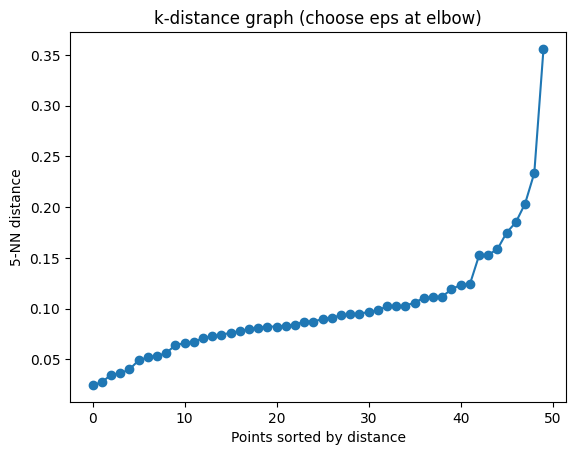

In [146]:
# take the kth NN distances (last column)
distances = np.sort(n_dists[:, -1])
plt.plot(distances, marker="o")
plt.ylabel(f"{5}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance graph (choose eps at elbow)")
plt.show()

`From the graph the clear elbow is ***0.10 / 0.15***, hence rad lesser than that will frame denser cluster and greater will contain noisy points`

In [151]:
dbscan_type_3 = DBSCAN(eps=0.15, min_samples=5)
result = dbscan_type_3.fit(data_normalised)
labels_db_3 = result.labels_
labels_db_3

array([ 0,  0,  1,  1, -1,  2,  2,  0,  3,  0,  0,  3,  1,  2,  1,  0,  3,
        3,  1,  0,  2,  3,  0,  3,  0,  1,  2,  0,  2,  3,  0,  3,  0,  0,
        2,  1,  1,  0,  3,  3,  0,  0,  0,  1,  2,  2,  1,  0,  0,  0])

In [154]:
# anomalies
anoms = labels_db_3 == -1
anoms

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [156]:
# normals 
norms = labels_db_3 != -1
norms

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

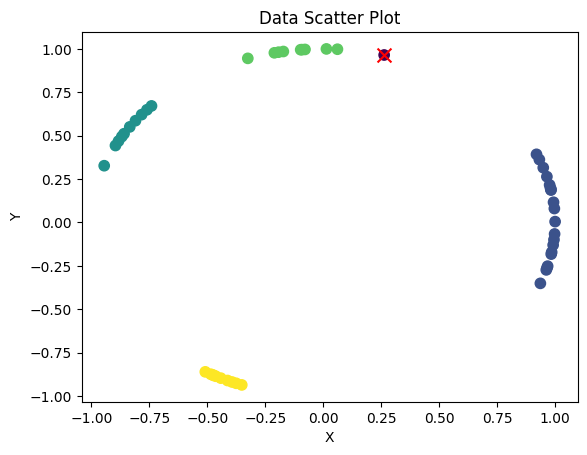

In [159]:
# Visualisation
plt.scatter(data_normalised[:, 0], data_normalised[:, 1], c=labels_db_3, cmap='viridis', s=55)
# plot anomalies (X markers, usually in red/black)
plt.scatter(data_normalised[anoms, 0], data_normalised[anoms, 1], c="red", marker="x", s=100, label="Anomaly")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Scatter Plot")
plt.show()

- Type4:
    - HDBSCAN method
        - ✅ Extension of DBSCAN that works at all density levels instead of fixing one eps.
        - ✅ Uses mutual reachability distance (inflated distances to avoid chaining).
        - ✅ Builds a minimum spanning tree (MST) of the data with this distance.
        - ✅ Creates a hierarchical cluster tree by varying density thresholds.
        - ✅ Measures cluster stability (persistence) = how long clusters survive in the hierarchy.
        - ✅ Extracts the most stable clusters and marks unstable points as noise (-1).
        - ✅ Main parameter: min_cluster_size (smallest group considered a cluster).
        - ✅ Handles clusters of varying density much better than DBSCAN.
        - ✅ Complexity ~ 𝑂(𝑛log𝑛), efficient for large datasets.

In [162]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

### Scoring Analysis

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [ ]:
# Silhouette scoring
# score1_db_1 = silhouette_score(data, labels_db_1) # will throw error -> algo behind it works only then when the labels are are 2 to n_samples - 1 (inclusive) 
score1_db_2 = silhouette_score(data_normalised, labels_db_2)
score1_db_3 = silhouette_score(data_normalised, labels_db_3)

score1_db_2, score1_db_3

(0.7693641377885946, 0.7644614854675196)

In [ ]:
# Random Index scoring
score2_db_1 = adjusted_rand_score(labels, labels_db_1) # determines the clustering is the worst
score2_db_2 = adjusted_rand_score(labels, labels_db_2) 
score2_db_3 = adjusted_rand_score(labels, labels_db_3)

score2_db_1, score2_db_2, score2_db_3

(0.0, 0.5950413223140496, 0.7434801402430239)